# Saumya Shah - 202401472

## Taylor Series of an Integral

### Objective
In this experiment, we will develop a Taylor series approximation for the function:

$$f(x) = \frac{1}{x} \int_{0}^{x} \frac{\sin(t)}{t} dt$$

**Goals:**
1.  **Derive the Series:** Construct a Taylor polynomial for $f(x)$ by expanding the integrand $\frac{\sin(t)}{t}$ and integrating term-by-term.
2.  **Error Bound:** Determine the number of terms ($N$) required to ensure the approximation error is less than  $5 \times 10^{-9}$ over the interval $|x| < 1$.
3.  **Validation:** Plot the error $|f_{exact}(x) - f_{approx}(x)|$ over the domain to verify that it remains below the prescribed bound. 

### Mathematical Formulation

**1. Expand $\sin(t)$:**
We start with the well-known Taylor series for sine:
$$\sin(t) = \sum_{n=0}^{\infty} (-1)^n \frac{t^{2n+1}}{(2n+1)!} = t - \frac{t^3}{3!} + \frac{t^5}{5!} - \dots$$

**2. Form the Integrand $\frac{\sin(t)}{t}$:**
Dividing the series by $t$:
$$\frac{\sin(t)}{t} = \sum_{n=0}^{\infty} (-1)^n \frac{t^{2n}}{(2n+1)!} = 1 - \frac{t^2}{3!} + \frac{t^4}{5!} - \dots$$

**3. Integrate Term-by-Term:**
We integrate the series from $0$ to $x$:
$$\int_{0}^{x} \frac{\sin(t)}{t} dt = \sum_{n=0}^{\infty} (-1)^n \frac{1}{(2n+1)!} \int_{0}^{x} t^{2n} dt$$
Using the power rule $\int t^k dt = \frac{t^{k+1}}{k+1}$:
$$\int_{0}^{x} \frac{\sin(t)}{t} dt = \sum_{n=0}^{\infty} (-1)^n \frac{x^{2n+1}}{(2n+1)(2n+1)!}$$

**4. Final Function $f(x)$:**
Finally, divide the whole result by $x$:
$$f(x) = \frac{1}{x} \sum_{n=0}^{\infty} (-1)^n \frac{x^{2n+1}}{(2n+1)(2n+1)!}$$
Simplifying ($x^{2n+1} / x = x^{2n}$):
$$f(x) = \sum_{n=0}^{\infty} (-1)^n \frac{x^{2n}}{(2n+1)(2n+1)!}$$

**Explicitly:**
$$f(x) = 1 - \frac{x^2}{3 \cdot 3!} + \frac{x^4}{5 \cdot 5!} - \frac{x^6}{7 \cdot 7!} + \dots$$

---

**Error Analysis Strategy:**
Since this is an **Alternating Series** (terms switch signs $+ - + -$) and the terms decrease in magnitude, the error of the approximation is bounded by the absolute value of the **first neglected term**.

We need to find $N$ such that the $(N+1)$-th term at the worst case ($x=1$) is less than $5 \times 10^{-9}$:
$$\left| \text{Term}_{N+1} \right| = \frac{1}{(2(N+1)+1)(2(N+1)+1)!} \le 5 \times 10^{-9}$$
We will solve this numerically in the code to determine the required number of terms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sici
from math import factorial

### Find smallest N such that worse case error (at x = 1) is less than tolerance  ($5 \times 10^{-9}$)

In [2]:
def find_required_terms(tolerance):

    n = 0
    while True:
        term_val = 1/((2*n + 1) * factorial(2*n + 1))

        if term_val < tolerance:
            return n
        n+=1  

### Taylor Approximation

In [3]:
def taylor_approximation(x,n_terms):

    result = 0

    for n in range(n_terms + 1):
        numerator = (-1)**n * x**(2*n)
        denominator = (2 * n + 1) * factorial(2 * n + 1)
        result += numerator/denominator

    return result    

### Exact function

In [4]:
def f_exact(x):

    si_val = sici(x)[0]
    return np.where(x == 0, 1.0, si_val / x)    

### Finding N

In [5]:
tolerance = 5e-9
N_terms = find_required_terms(tolerance)
print(f"We need {N_terms} terms")

We need 5 terms


### Generate Data

In [6]:
x_vals = np.linspace(-1,1,200)
y_exact = f_exact(x_vals)
y_appx = taylor_approximation(x_vals,N_terms)
error = np.abs(y_exact - y_appx)

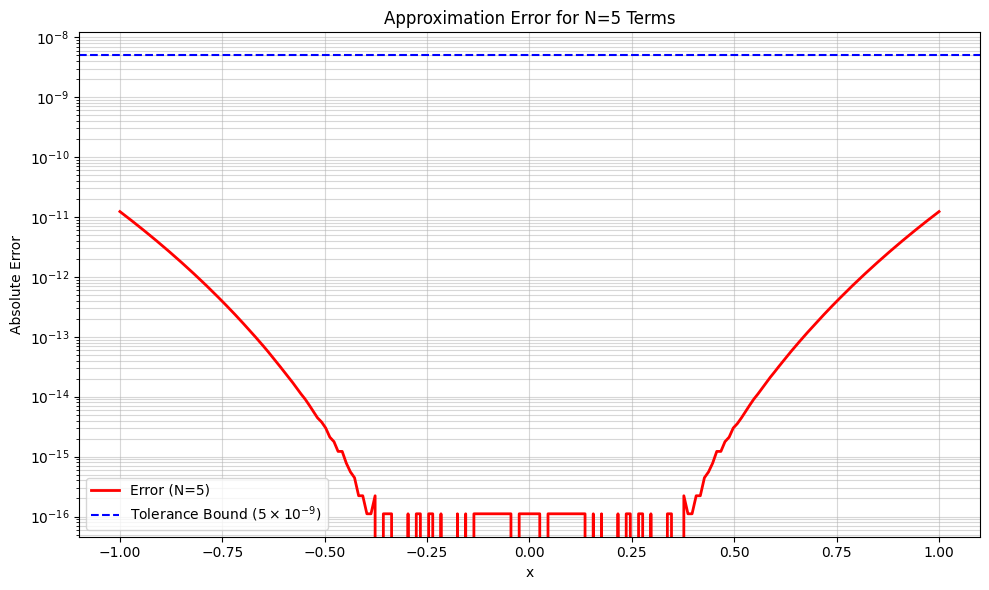

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(x_vals, error, 'r-', linewidth=2, label=f'Error (N={N_terms})')


plt.axhline(y=tolerance, color='b', linestyle='--', label='Tolerance Bound ($5 \\times 10^{-9}$)')

plt.title(f'Approximation Error for N={N_terms} Terms')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.yscale('log') # Log scale helps see small errors better
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

## Observations

From the plot generated above, we can observe the following behaviors of the approximation:

1.  **Error Magnitude:**
    The maximum absolute error occurs at the boundaries of the interval ($x = \pm 1$). The peak error is approximately $1.2 \times 10^{-11}$. This is significantly lower than the required tolerance of $5 \times 10^{-9}$, indicating that our Taylor polynomial is highly precise.

2.  **Error Distribution:**
    * **At $x=0$:** The error is effectively zero (hovering around $10^{-16}$), which represents the limit of machine precision. This is expected since the expansion is centered at $0$.
    * **Symmetry:** The error curve is symmetric about the y-axis. This confirms that our function $f(x)$ is an **even function** (it only contains even powers $x^0, x^2, x^4...$), so the error magnitude is identical for positive and negative $x$.

3.  **Validation:**
    The red error curve remains strictly below the blue dashed tolerance line across the entire domain $|x| < 1$, successfully validating the derived number of terms.

### 5. Conclusion

In this experiment, we successfully developed a Taylor series approximation for the Sine Integral function:
$$f(x) = \frac{1}{x} \int_{0}^{x} \frac{\sin(t)}{t} dt \approx \sum_{n=0}^{N} (-1)^n \frac{x^{2n}}{(2n+1)(2n+1)!}$$

**Key Findings:**
* **Convergence:** The series converges extremely rapidly. We determined numerically that including terms up to **$N=5$** (which corresponds to the power $x^{10}$) is sufficient to suppress the error well below $5 \times 10^{-9}$.
* **Efficiency:** By retaining just these first 6 terms (indices 0 to 5), we achieved an accuracy of approximately $10^{-11}$ at the interval boundaries.